In [29]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('owid-covid-data.csv')
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN   

In [37]:
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [39]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [41]:
df.isnull().sum()

iso_code                                     0
continent                                 3715
location                                     0
date                                         0
total_cases                               1242
new_cases                                 1244
new_cases_smoothed                        2245
total_deaths                             10501
new_deaths                               10343
new_deaths_smoothed                       2245
total_cases_per_million                   1647
new_cases_per_million                     1649
new_cases_smoothed_per_million            2645
total_deaths_per_million                 10893
new_deaths_per_million                   10735
new_deaths_smoothed_per_million           2645
reproduction_rate                        14806
icu_patients                             67799
icu_patients_per_million                 67799
hosp_patients                            66221
hosp_patients_per_million                66221
weekly_icu_ad

In [43]:
df_Africa = df[(df['continent'] == 'Africa')]
print(df_Africa)

      iso_code continent  location        date  total_cases  new_cases  \
1174       DZA    Africa   Algeria  2020-02-25          1.0        1.0   
1175       DZA    Africa   Algeria  2020-02-26          1.0        0.0   
1176       DZA    Africa   Algeria  2020-02-27          1.0        0.0   
1177       DZA    Africa   Algeria  2020-02-28          1.0        0.0   
1178       DZA    Africa   Algeria  2020-02-29          1.0        0.0   
...        ...       ...       ...         ...          ...        ...   
75553      ZWE    Africa  Zimbabwe  2021-03-13      36471.0       48.0   
75554      ZWE    Africa  Zimbabwe  2021-03-14      36484.0       13.0   
75555      ZWE    Africa  Zimbabwe  2021-03-15      36504.0       20.0   
75556      ZWE    Africa  Zimbabwe  2021-03-16      36535.0       31.0   
75557      ZWE    Africa  Zimbabwe  2021-03-17      36552.0       17.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
1174                  NaN     

In [45]:
df_Africa['date'] = pd.to_datetime(df_Africa['date'])
df_Africa_no_missing_date = df_Africa.dropna(subset=['date'])
print("\nDataFrame after dropping rows with missing dates:")
print(df_Africa_no_missing_date.head())


DataFrame after dropping rows with missing dates:
     iso_code continent location       date  total_cases  new_cases  \
1174      DZA    Africa  Algeria 2020-02-25          1.0        1.0   
1175      DZA    Africa  Algeria 2020-02-26          1.0        0.0   
1176      DZA    Africa  Algeria 2020-02-27          1.0        0.0   
1177      DZA    Africa  Algeria 2020-02-28          1.0        0.0   
1178      DZA    Africa  Algeria 2020-02-29          1.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
1174                 NaN           NaN         NaN                  NaN  ...   
1175                 NaN           NaN         NaN                  NaN  ...   
1176                 NaN           NaN         NaN                  NaN  ...   
1177                 NaN           NaN         NaN                  NaN  ...   
1178                 NaN           NaN         NaN                  NaN  ...   

      gdp_per_capita  extreme_poverty  ca

C:\Users\Admin\AppData\Local\Temp\ipykernel_24628\3144764967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Africa['date'] = pd.to_datetime(df_Africa['date'])


In [93]:
df_critical_columns = ['date','location','total_cases','total_deaths','new_cases','new_deaths','total_vaccinations']
print(df_critical_columns)

['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']


In [95]:
df_Africa_no_missing_critical = df_Africa_no_missing_date.dropna(subset=df_critical_columns)
print("\nDataFrame after dropping rows with missing critical values ('date','location','total_cases','total_deaths','new_cases','new_deaths','total_vaccinations'):")
print(df_Africa_no_missing_critical.head())


DataFrame after dropping rows with missing critical values ('date','location','total_cases','total_deaths','new_cases','new_deaths','total_vaccinations'):
     iso_code continent location       date  total_cases  new_cases  \
1513      DZA    Africa  Algeria 2021-01-29     106887.0      277.0   
1514      DZA    Africa  Algeria 2021-01-30     107122.0      235.0   
1534      DZA    Africa  Algeria 2021-02-19     111600.0      182.0   
2292      AGO    Africa   Angola 2021-03-05      21026.0       45.0   
2295      AGO    Africa   Angola 2021-03-08      21108.0       22.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
1513             251.857        2884.0         3.0                4.000  ...   
1514             250.429        2888.0         4.0                3.857  ...   
1534             185.286        2954.0         4.0                3.143  ...   
2292              38.143         511.0         0.0                1.000  ...   
2295             

In [105]:
# For the subsequent tasks, we will use df_Africa_no_missing_critical
df_processed = df_Africa_no_missing_critical.copy()

In [109]:
#Convert date column to datetime: pd.to_datetime().
# This was already done in the previous step to handle missing dates effectively.
print("\n'date' column dtype after conversion:")
print(df_processed['date'].dtype)


'date' column dtype after conversion:
datetime64[ns]


In [113]:
# Handle missing numeric values with fillna() or interpolate().
# Identify numeric columns that might have missing values
numeric_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
# Remove the columns we already considered 'critical' for dropping NaNs
numeric_cols_to_fill = [col for col in numeric_cols if col not in df_critical_columns]

print("\nNumeric columns with potential missing values to fill:")
print(numeric_cols_to_fill)


Numeric columns with potential missing values to fill:
['new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index', 'population', 'population_density', 'median_age'

In [115]:
print("\nMissing values in numeric columns after handling:")
print(df_processed[numeric_cols_to_fill].isnull().sum())


Missing values in numeric columns after handling:
new_cases_smoothed                         0
new_deaths_smoothed                        0
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             0
total_deaths_per_million                   0
new_deaths_per_million                     0
new_deaths_smoothed_per_million            0
reproduction_rate                         12
icu_patients                             205
icu_patients_per_million                 205
hosp_patients                            205
hosp_patients_per_million                205
weekly_icu_admissions                    205
weekly_icu_admissions_per_million        205
weekly_hosp_admissions                   205
weekly_hosp_admissions_per_million       205
new_tests                                 92
total_tests                               85
total_tests_per_thousand                  85
new_tests_per_thousand                    92
new_

In [117]:
countries_of_interest =['Kenya','Nigeria']
df_selected_countries = df_processed[df_processed['location'].isin(countries_of_interest)].copy()
print(df_selected_countries)

      iso_code continent location       date  total_cases  new_cases  \
36214      KEN    Africa    Kenya 2021-03-04     107329.0      528.0   
36220      KEN    Africa    Kenya 2021-03-10     110356.0      713.0   
36224      KEN    Africa    Kenya 2021-03-14     113236.0      431.0   
36227      KEN    Africa    Kenya 2021-03-17     116310.0     1279.0   
49680      NGA    Africa  Nigeria 2021-03-04     157671.0      711.0   
49691      NGA    Africa  Nigeria 2021-03-15     160895.0      238.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
36214             324.571        1870.0         4.0                3.286  ...   
36220             507.857        1898.0        12.0                4.571  ...   
36224             629.857        1913.0         5.0                5.286  ...   
36227             850.571        1937.0        12.0                5.571  ...   
49680             456.429        1951.0        12.0                8.571  ...   
49691    

In [119]:
# 3. Handle missing numeric values (if any remain after dropping)
numeric_cols_to_fill_selected = df_selected_countries.select_dtypes(include=np.number).columns.tolist()
cols_to_not_fill = ['total_cases', 'total_deaths', 'new_cases'] # Already handled by dropping NaNs
numeric_cols_to_fill_selected = [col for col in numeric_cols_to_fill_selected if col not in cols_to_not_fill]

In [121]:
# --- Plotting ---

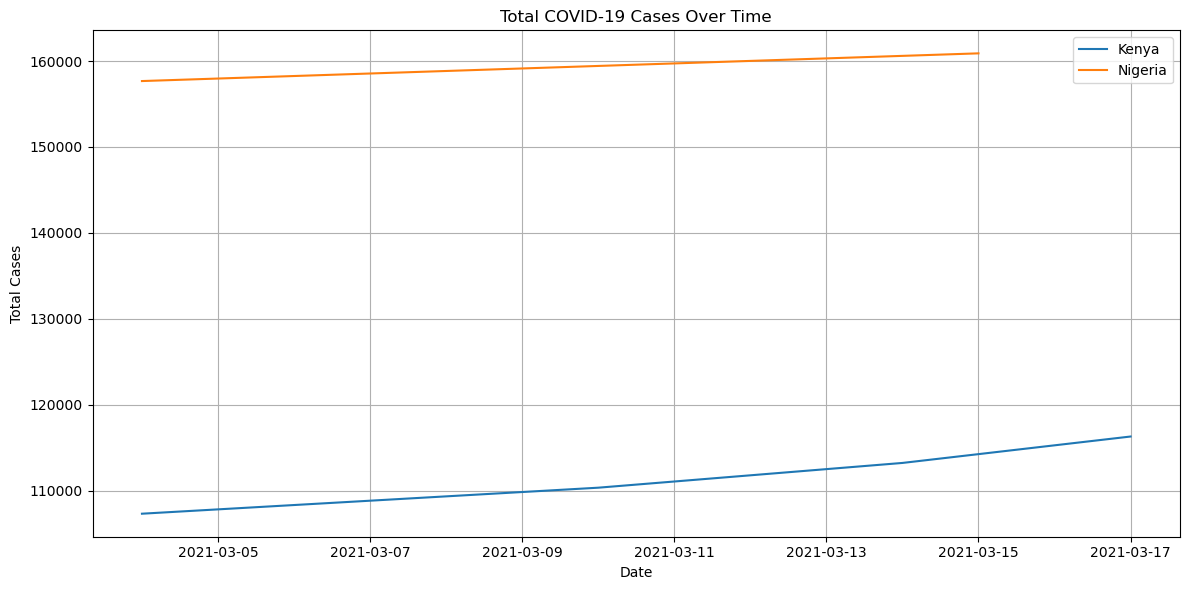

In [123]:
# Plot 1: Total cases over time for selected countries
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_selected_countries[df_selected_countries['location'] == country]
    plt.plot(df_country['date'], df_country['total_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

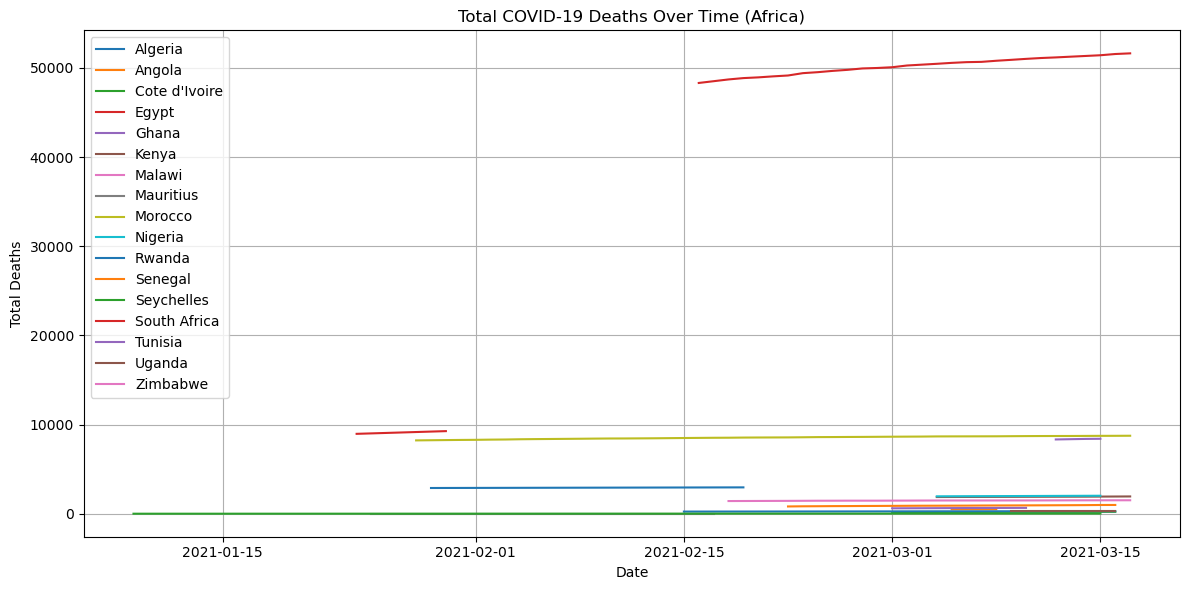

In [125]:
# Plot 2: Total deaths over time (for all of Africa, based on your initial filtering)
plt.figure(figsize=(12, 6))
for country in df_Africa_no_missing_critical['location'].unique():
    df_country_deaths = df_Africa_no_missing_critical[df_Africa_no_missing_critical['location'] == country].sort_values('date')
    plt.plot(df_country_deaths['date'], df_country_deaths['total_deaths'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time (Africa)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


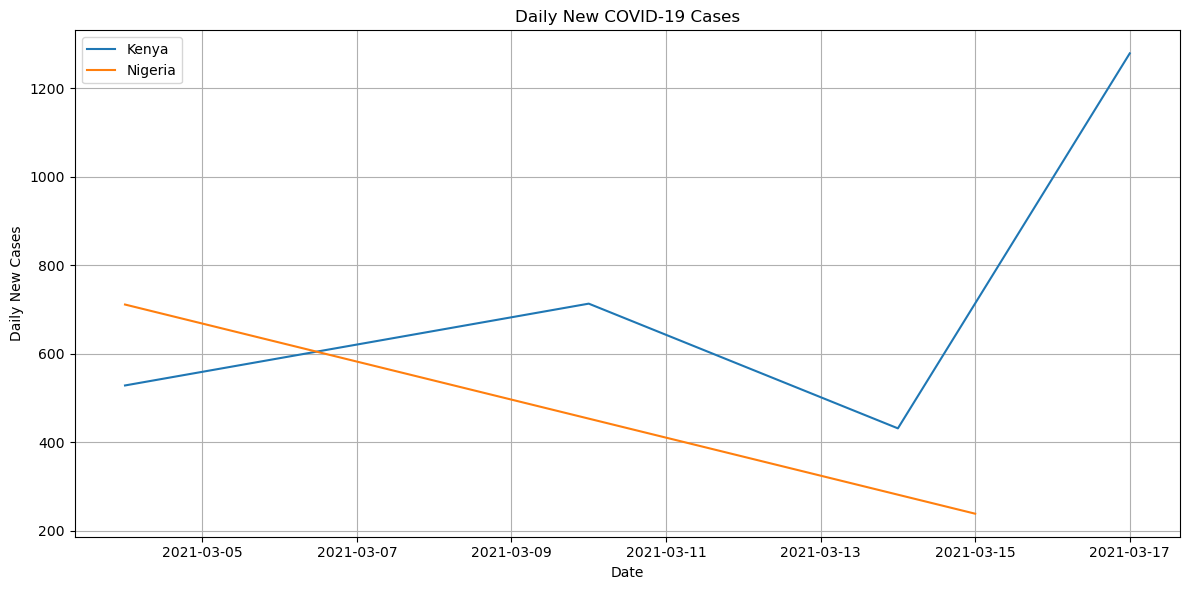

In [126]:
# Plot 3: Compare daily new cases between selected countries
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country_new_cases = df_selected_countries[df_selected_countries['location'] == country]
    plt.plot(df_country_new_cases['date'], df_country_new_cases['new_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
# 4. Calculate the death rate: total_deaths / total_cases
df_selected_countries['death_rate'] = df_selected_countries['total_deaths'] / df_selected_countries['total_cases']

print("\nDeath Rate for Selected Countries:")
print(df_selected_countries[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head())


Death Rate for Selected Countries:
      location       date  total_cases  total_deaths  death_rate
36214    Kenya 2021-03-04     107329.0        1870.0    0.017423
36220    Kenya 2021-03-10     110356.0        1898.0    0.017199
36224    Kenya 2021-03-14     113236.0        1913.0    0.016894
36227    Kenya 2021-03-17     116310.0        1937.0    0.016654
49680  Nigeria 2021-03-04     157671.0        1951.0    0.012374


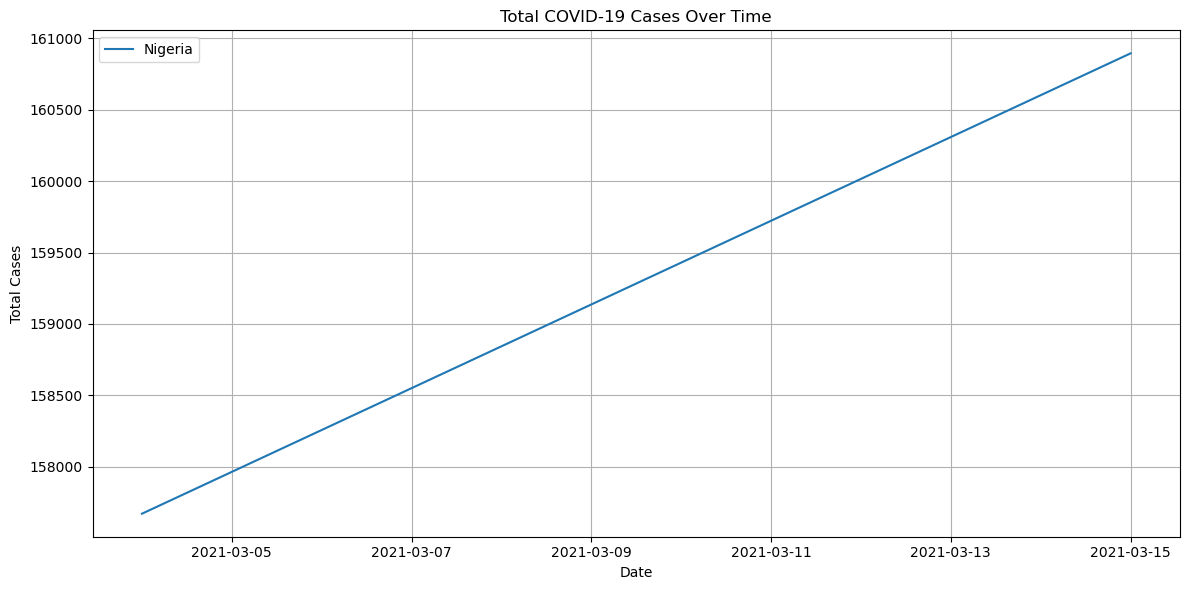

In [129]:
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_selected_countries[df_selected_countries['location'] == country].sort_values(by='date')
plt.plot(df_country['date'], df_country['total_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

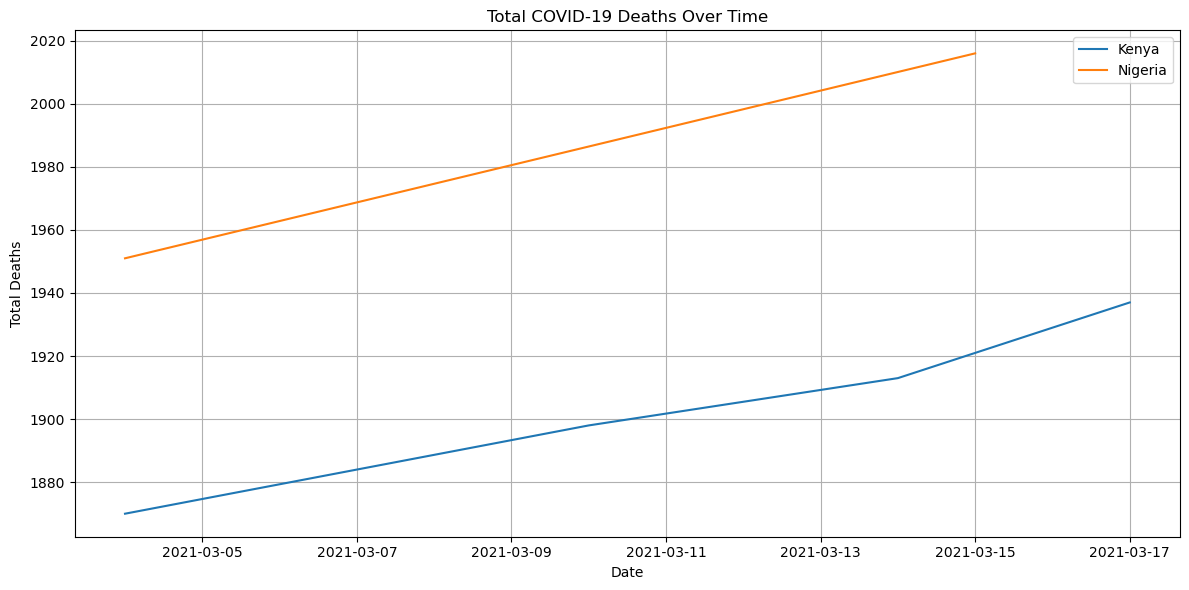

In [137]:
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_selected_countries[df_selected_countries['location'] == country].sort_values(by='date')
    plt.plot(df_country['date'], df_country['total_deaths'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


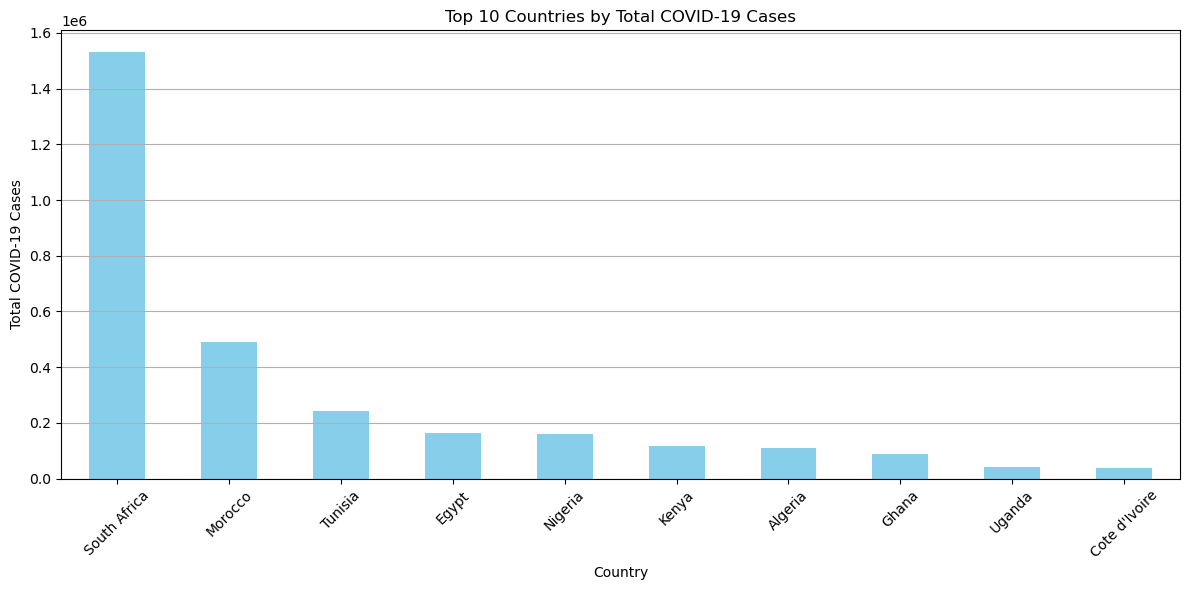

In [139]:

# 1. Group by country and get the max total_cases per country
df_max_cases = df_processed.groupby('location')['total_cases'].max().sort_values(ascending=False)

# 2. Select top 10 countries
top_countries = df_max_cases.head(10)

# 3. Plot bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total COVID-19 Cases')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [141]:
print(df_selected_countries.columns)



Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

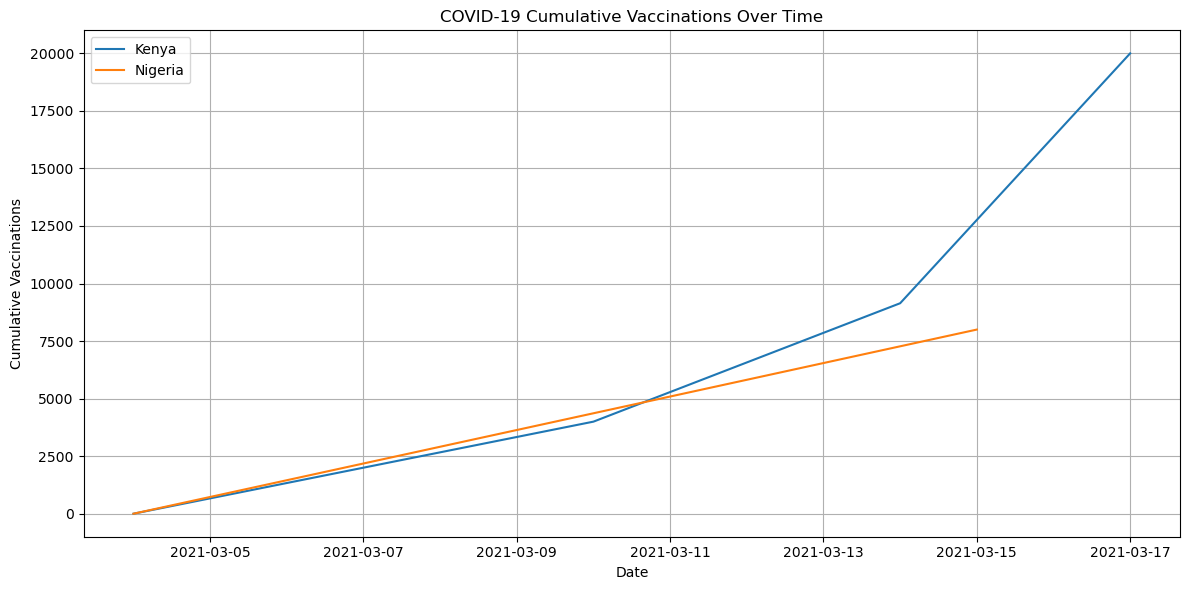

In [143]:
plt.figure(figsize=(12, 6))

for country in countries_of_interest:
    df_country = df_selected_countries[df_selected_countries['location'] == country].sort_values(by='date')
    plt.plot(df_country['date'], df_country['total_vaccinations'], label=country)

plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.title('COVID-19 Cumulative Vaccinations Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


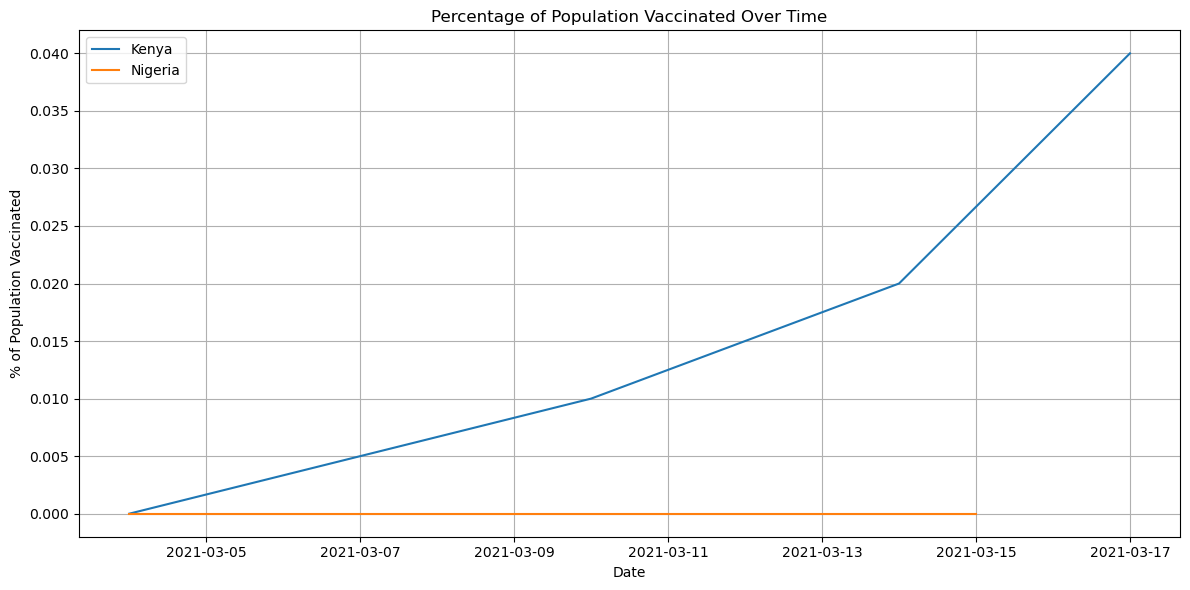

In [145]:
plt.figure(figsize=(12, 6))

for country in countries_of_interest:
    df_country = df_selected_countries[df_selected_countries['location'] == country].sort_values(by='date')
    plt.plot(df_country['date'], df_country['people_vaccinated_per_hundred'], label=country)

plt.xlabel('Date')
plt.ylabel('% of Population Vaccinated')
plt.title('Percentage of Population Vaccinated Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
